In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Chargement du dataset
file_path = r'Base.csv'
df = pd.read_csv(file_path)

# Suppression des colonnes catégorielles
categorical_columns = ['payment_type', 'employment_status', 'housing_status', 'source', 'device_os']
df = df.drop(columns=categorical_columns)

# Suppression des lignes avec des valeurs manquantes
df = df.dropna()

# Séparation des caractéristiques (X) et de la cible (y)
X = df.drop(columns=['fraud_bool'])
y = df['fraud_bool']

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Suréchantillonnage avec SMOTE pour équilibrer les classes
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Normalisation des données
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

# Modèle KNN avec distance euclidienne
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train_resampled, y_train_resampled)

# Prédictions
y_pred = knn.predict(X_test)

# Évaluation
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Accuracy: 0.8875
Confusion Matrix:
[[265075  31635]
 [  2101   1189]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.89      0.94    296710
           1       0.04      0.36      0.07      3290

    accuracy                           0.89    300000
   macro avg       0.51      0.63      0.50    300000
weighted avg       0.98      0.89      0.93    300000



Hyperparametres :
Justification de l'utilisation de la distance euclidienne:
+Elle calcule la distance droite la plus courte entre deux points, ce qui correspond à la notion classique de distance dans un espace multidimensionnel.
+Après normalisation (comme avec StandardScaler ici), chaque caractéristique a la même échelle, ce qui rend la distance euclidienne pertinente pour comparer les points.

Justification de l'utilisation de 5 comme nombre de voisins:
k=5 est un choix classique pour garantir une classification robuste tout en limitant le bruit.

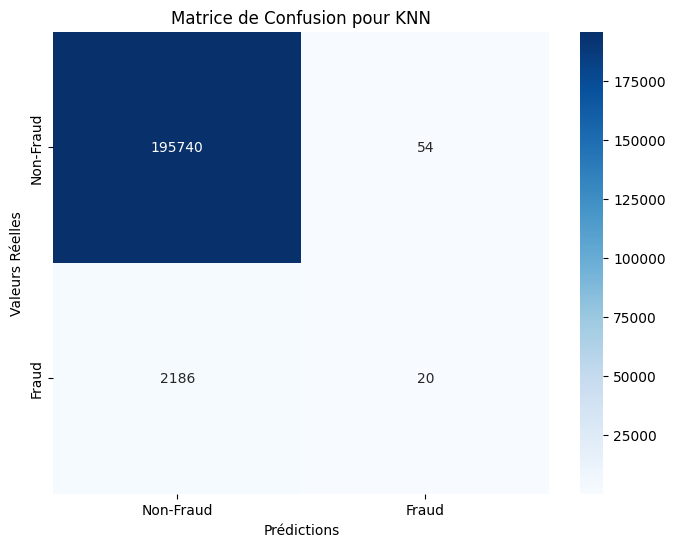

In [6]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calcul de la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)

# Affichage graphique de la matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Fraud", "Fraud"], yticklabels=["Non-Fraud", "Fraud"])
plt.title("Matrice de Confusion pour KNN")
plt.xlabel("Prédictions")
plt.ylabel("Valeurs Réelles")
plt.show()

